# Estimate the Verwey transition temperature

This using remanence upon warming curves developed through MPMS experiments and uses them to estimate the Verwey transition temperature.

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import rockmag as rmag
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import measurements

After having run the [rockmag_data_unpack.ipynb](./rockmag_data_unpack.ipynb) notebook, the folder `./example_data/ECMB`, has a measurements table. We can import that table for analysis into a DataFrame that we will call `measurements`.

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = './example_data/ECMB'

file = dir_path + '/measurements.txt'
measurements = pd.read_csv(file, sep='\t', skiprows=1)

## Background on the Verwey transition

For these mafic dikes from the East Central Minnesota batholith, the specimens exhibit a significant loss of remanence across the Verwey transition. The Verwey transition as defined by Jackson and Moskowitz (2020) is:

> The Verwey transition is a reorganization of the magnetite crystal structure occurring at a temperature T<sub>V</sub> in the range 80–125 K, where the room-temperature cubic inverse-spinel structure transforms to a monoclinic arrangement, and many physical properties of the mineral (e.g. electrical resistivity, heat capacity, magnetic susceptibility, remanence and coercivity) change significantly

It is of interest to determine the Verwey transition temperature (T<sub>V</sub>) as it is highly sensitive to changes in magnetite stoichiometry associated with cation substitution or oxidation.

### Estimating the Verwey transition temperature

It is preferable to estimate the temperature of the Verwey transition (T<sub>V</sub>) associated with warming curves (e.g. the FC/ZFC data) than cooling curves. The rationale is that cooling curves also pass through the isotropic point at a temperature of ∼130 K prior to going through the Verwey transition. The loss of magnetization associated with going through the isotropic point can be very large (particularly for multidomain magnetites) which can obscure the Verwey transition (Jackson and Moskowitz, 2020).

We can apply the method described in Jackson and Moskowitz (2020) to estimate the temperature of the Verwey transition. In this method, 

> [This approach] assumes that the loss of remanence on warming is due to the superposition of (1) progressive unblocking over the 20–300 K temperature range [e.g. due to the transition from the stable single-domain (SSD) to the superparamagnetic (SP) state in nanoparticle populations of magnetite or other magnetic phases] and (2) domain reorganization and intraparticle remanence rotation in a discrete temperature window around T<sub>V</sub>, due to the monoclinic-to-cubic transformation in magnetite.

The method to estimate the temperature of the Verwey transition of Jackson and Moskowitz (2020) is to fit the derivative of the data outside of the Verwey transition and then subtract that fit from the derivative. This approach seeks to isolate the signal that is due to the Verwey transition. The peak of the derivative curve can then be used to estimate T<sub>V</sub>. This is done as the interpolated zero crossing of the derivative of the spectrum curve.

In the code cell below, we define the temperature and magnetization values that will be used for estimating T<sub>V</sub>. The following parameters can be adjusted:

`t_range_background_min` and `t_range_background_max`: The temperature range over which the polynomial fit is applied to the background
`excluded_t_min` and `excluded_t_max`: The temperature range that is excluded from the background fit due to remanence loss associated with the Verwey transition.
`poly_deg`: the degree of the polynomial fit that is made to the background. Following Jackson and Moskowitz (2020), the default is set to be 3 (cubic).

As described in Jackson and Moskowitz (2020), these temperature ranges and polynomial degree can be adjusted to obtain ‘reasonable’ looking curves for the magnetite demagnetization and the progressive unblocking. The goal is for curves that are monotonic with and fits that are within the measurement noise, while seeking to minimizing the polynomial degree.

## Interactively fit the Verwey transition

First we need to pick the specimen and the experiment (FC or ZFC curve) to analyze.

In [3]:
specimen_dropdown, method_dropdown = rmag.interactive_verwey_specimen_method_selection(measurements)

Once a sample is selected, we can estimate the Verwey transition using the method described above. Adjust the sliders to change the range of the background that is being fit, the temperature range that is being excluded from the background fit, and the polynomial degree that is being used for the background fit. 

*Note: if you change the specimen or method in the dropdown menus above, rerun the code in the cell below to do the fit for the new specimen.*

In [4]:
rmag.interactive_verwey_estimate(measurements, specimen_dropdown, method_dropdown)

Output(layout=Layout(height='500px'))

## Use the `rmag.verwey_estimate` function

The interactive widgets above are using the function `rmag.verwey_estimate`. Rather than putting in the values using the interactive widgets, they can be specified and passed to the function. This approach is being taken in the code cell below.

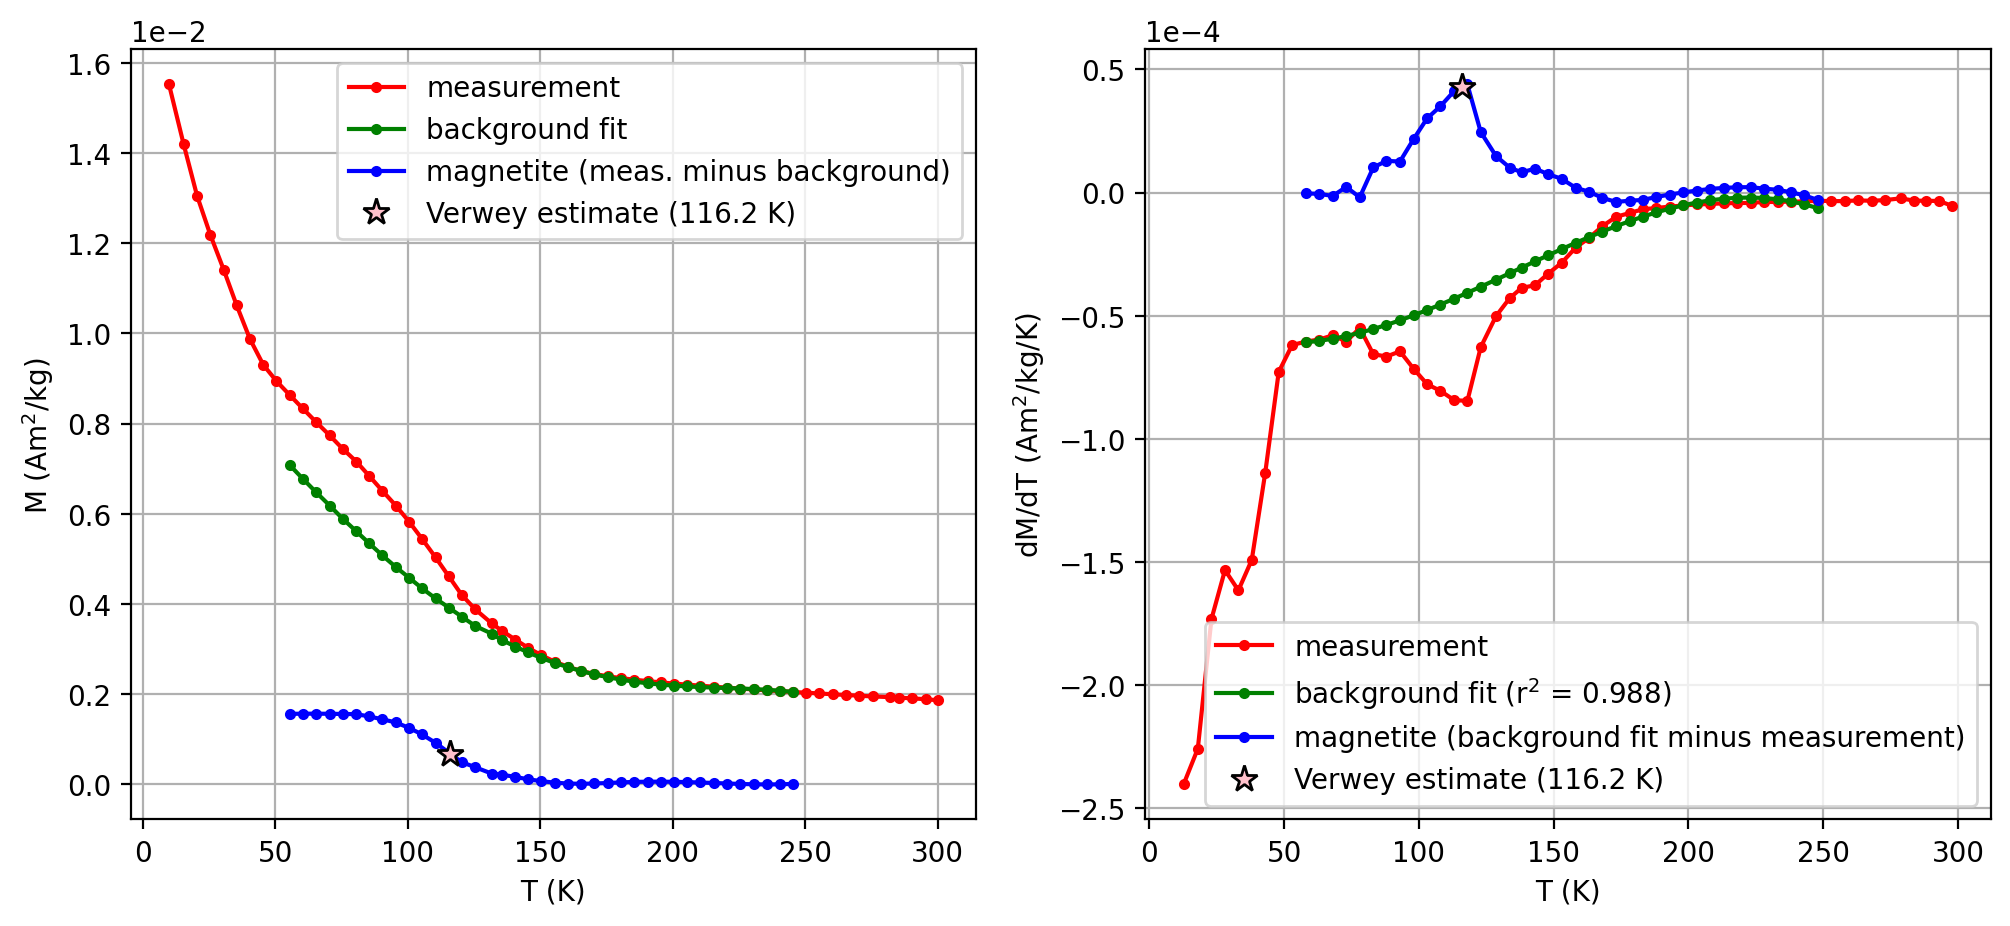

In [3]:
specimen_name = 'NED2-8c'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']

#Enter the minimum temperature for the background fit
t_range_background_min = 55 

#Enter the maximum temperature for the background fit
t_range_background_max = 250 

#Enter the minimum temperature to exclude from the background fit
excluded_t_min = 75 

#Enter the maximum temperature to exclude from the background fit
excluded_t_max = 150 

#The polynomial degree for the background fit can be adjusted (default is 3)
poly_deg = 3

verwey_estimate = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min,
                                       t_range_background_max,
                                       excluded_t_min,
                                       excluded_t_max,
                                       poly_deg)

## Plot the second derivative curve

The estimate of the Verwey transition calculated above uses second derivative and calculates where the second derivative crosses zero by interpolating from the points on either side of the peak in the first derivative. This calculation can be visualized by setting the parameter `plot_zero_crossing = True` which generates an additional plot.

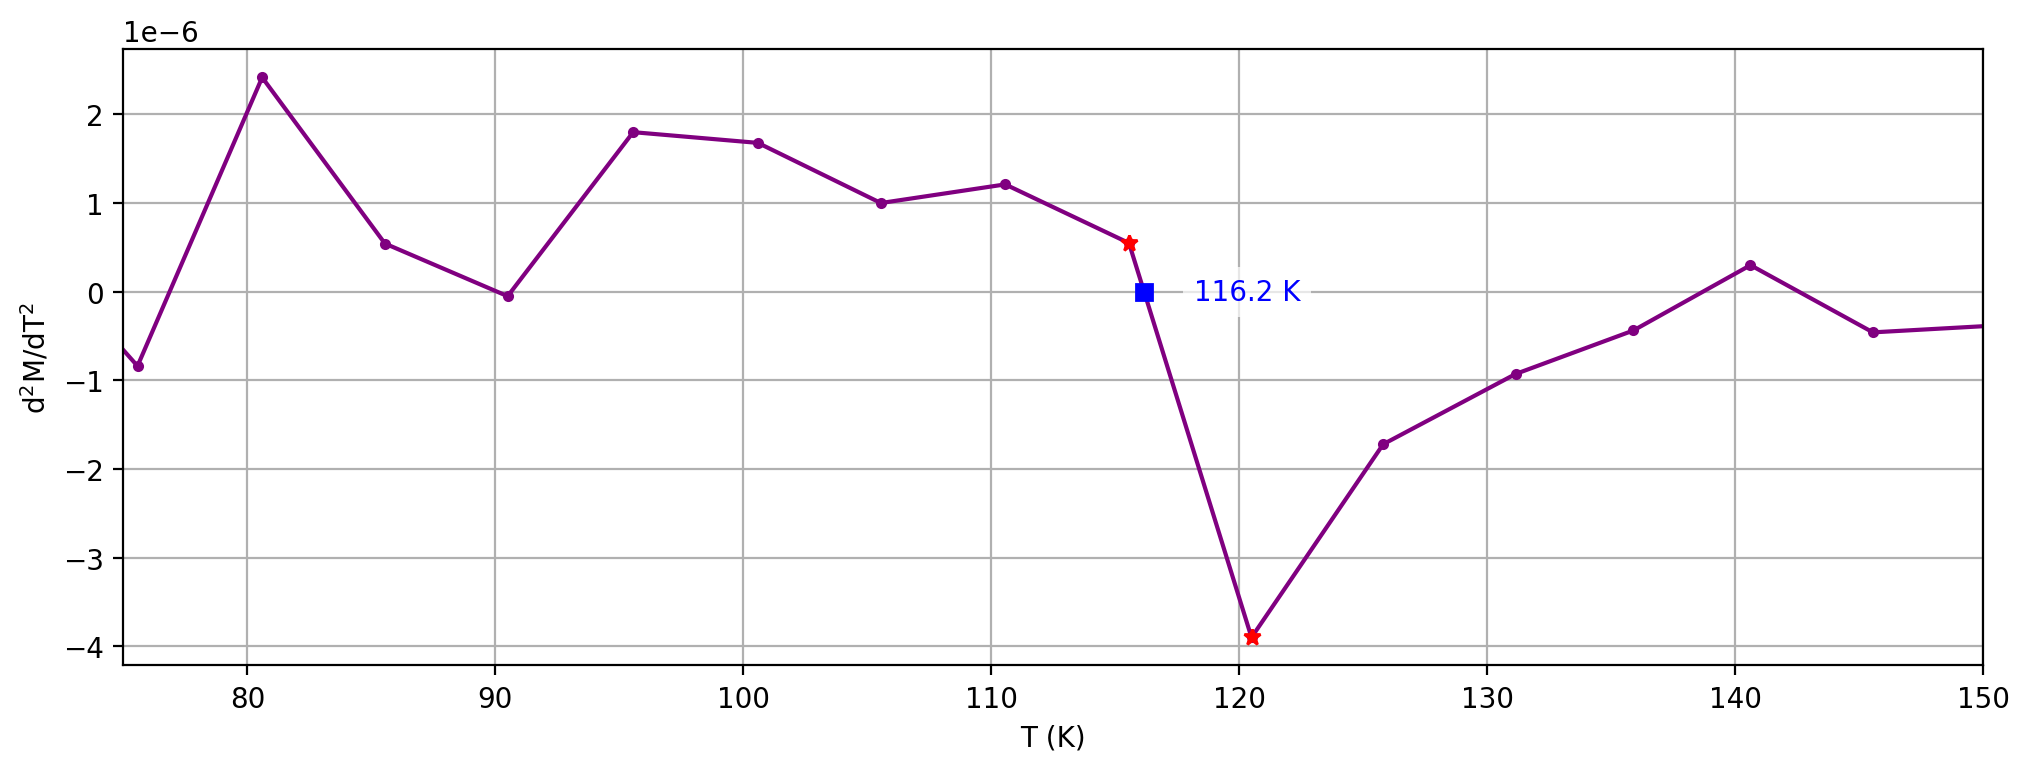

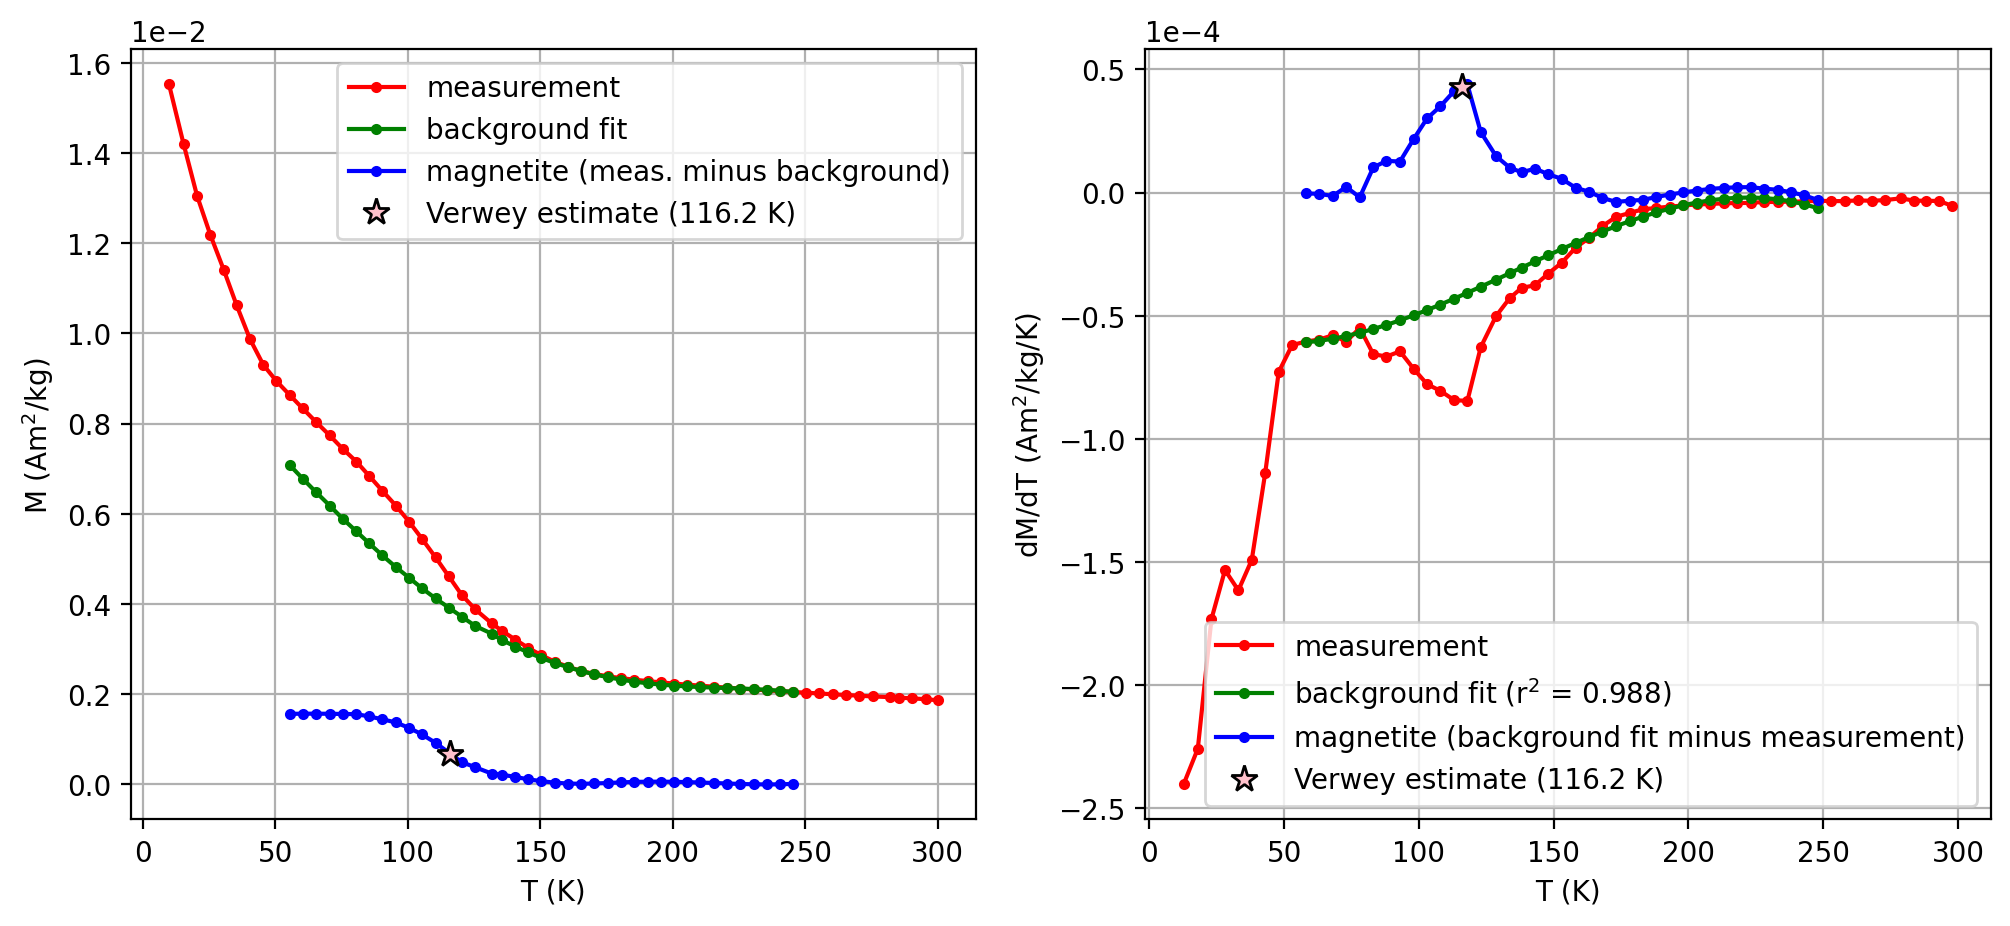

In [4]:
verwey_estimate = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min,
                                       t_range_background_max,
                                       excluded_t_min,
                                       excluded_t_max,
                                       poly_deg,
                                       plot_zero_crossing = True)

## Determine the Verwey temperatures for additional specimens

There are three more specimens with LT-SIRM data. Let's plot those data and determine Verwey temperature estimates.

NED18-2c


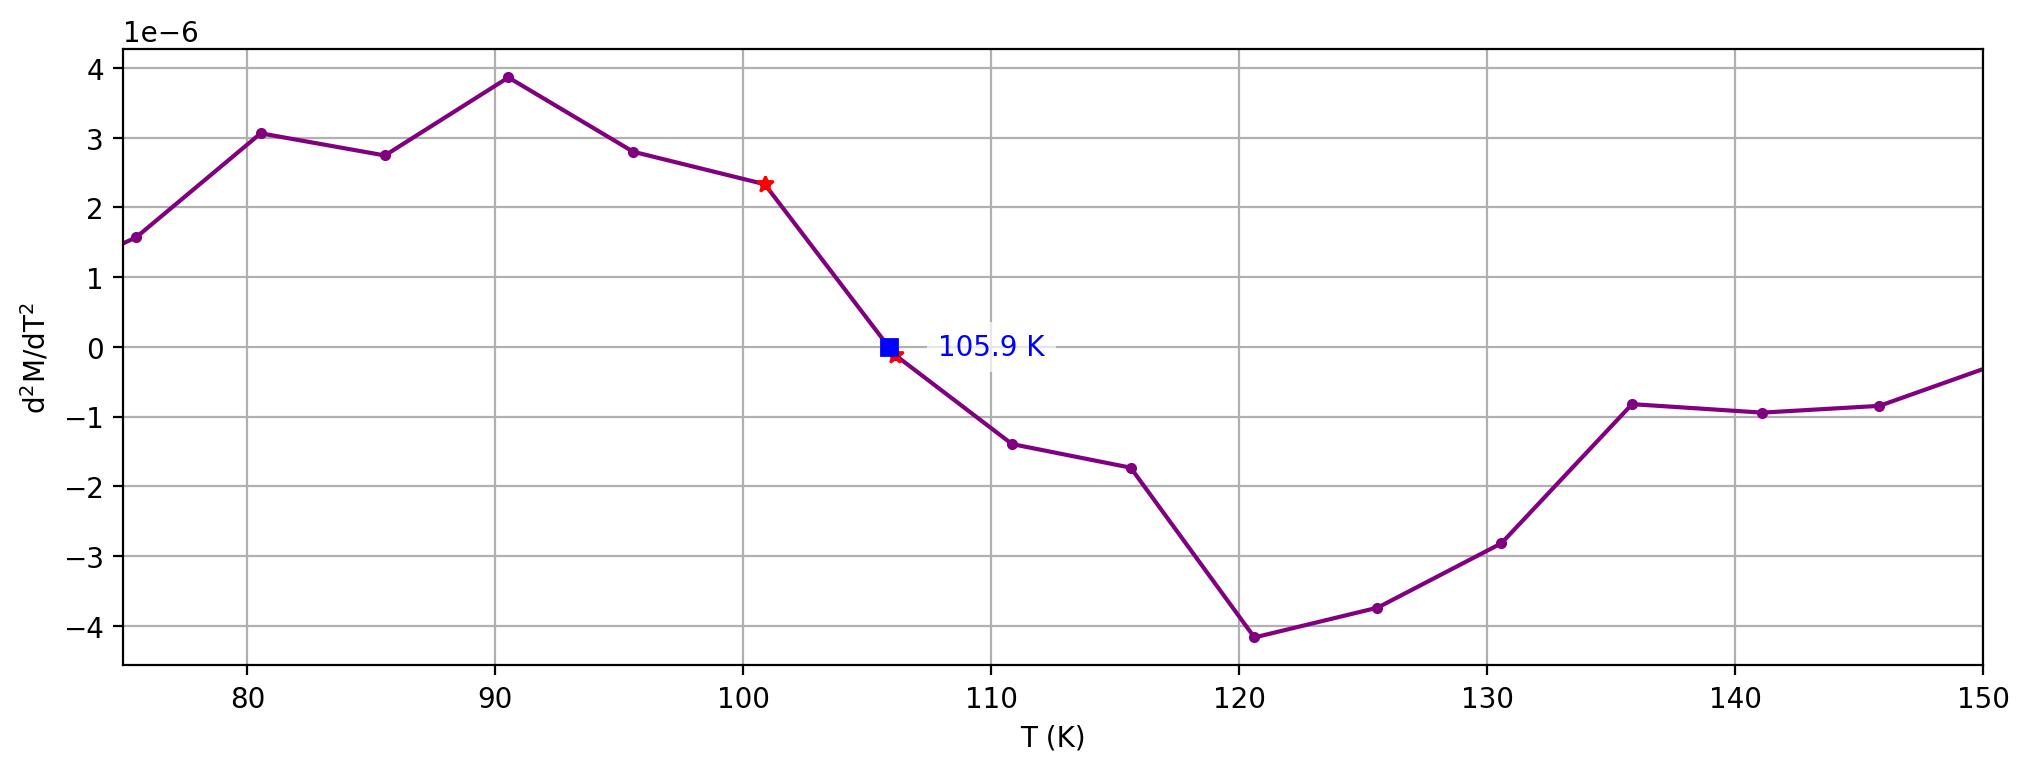


NED2-8c


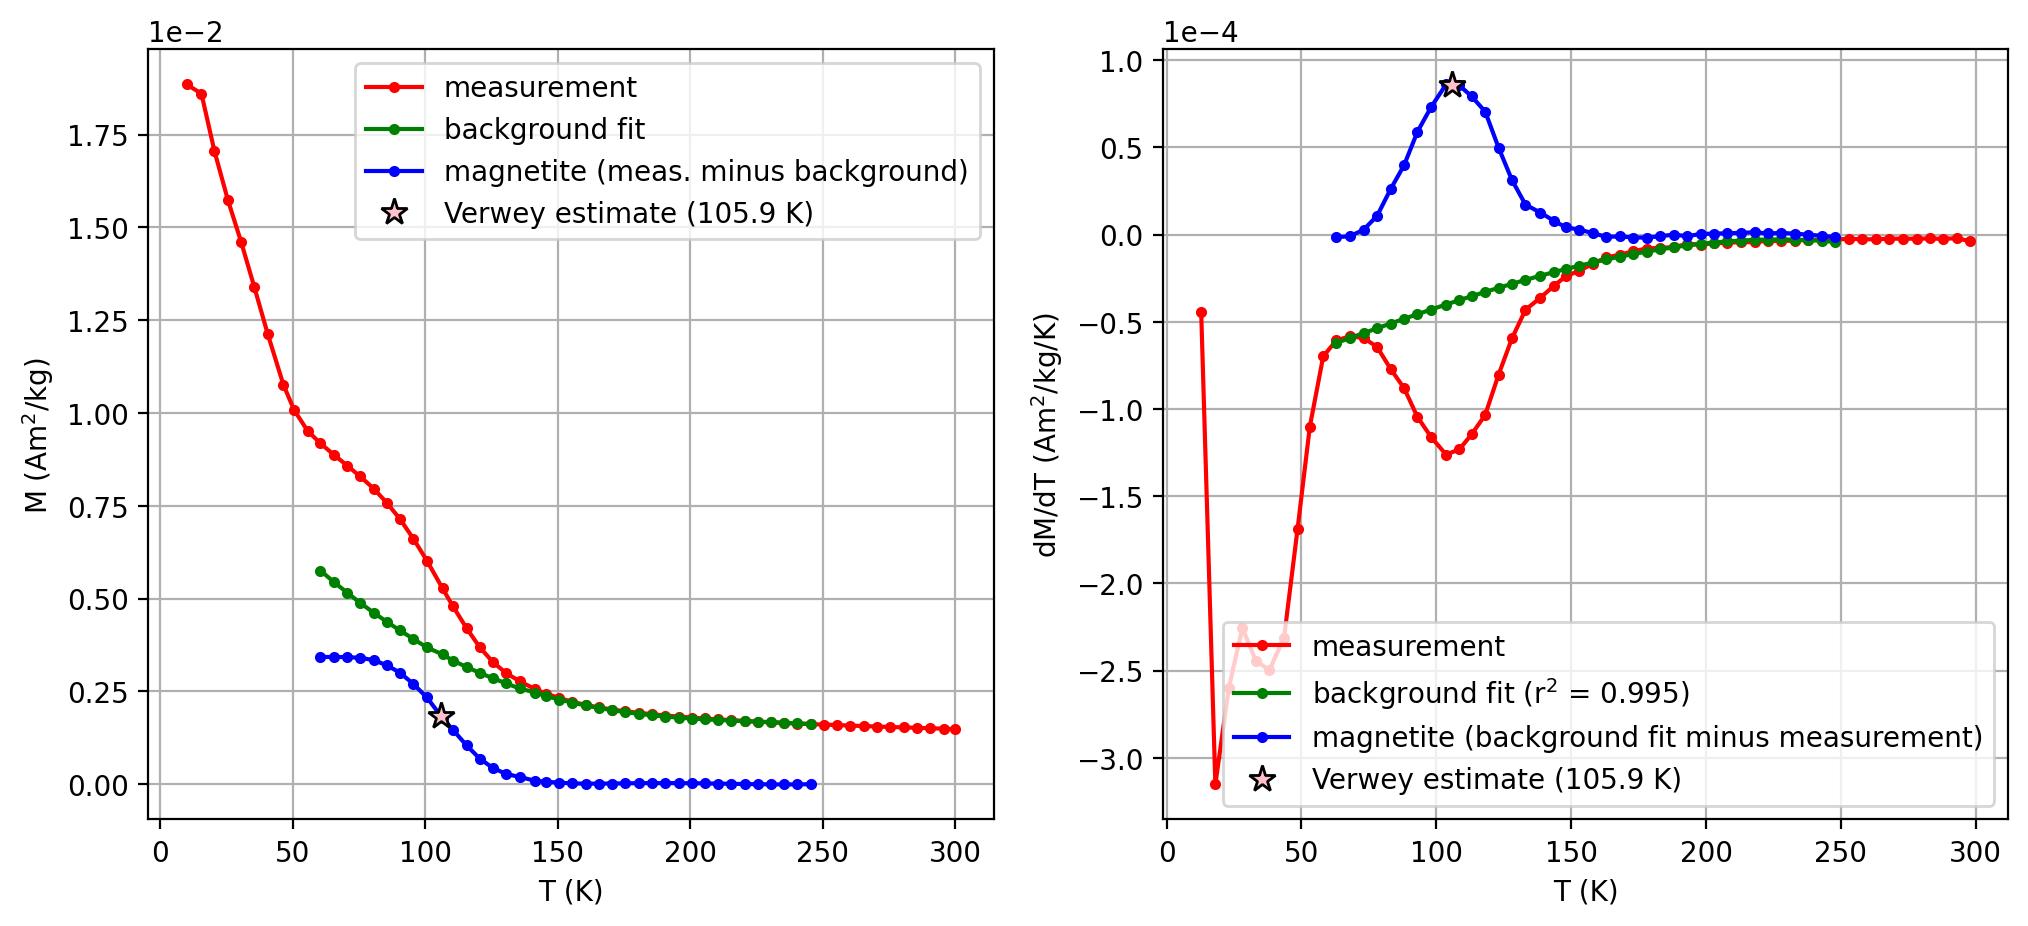

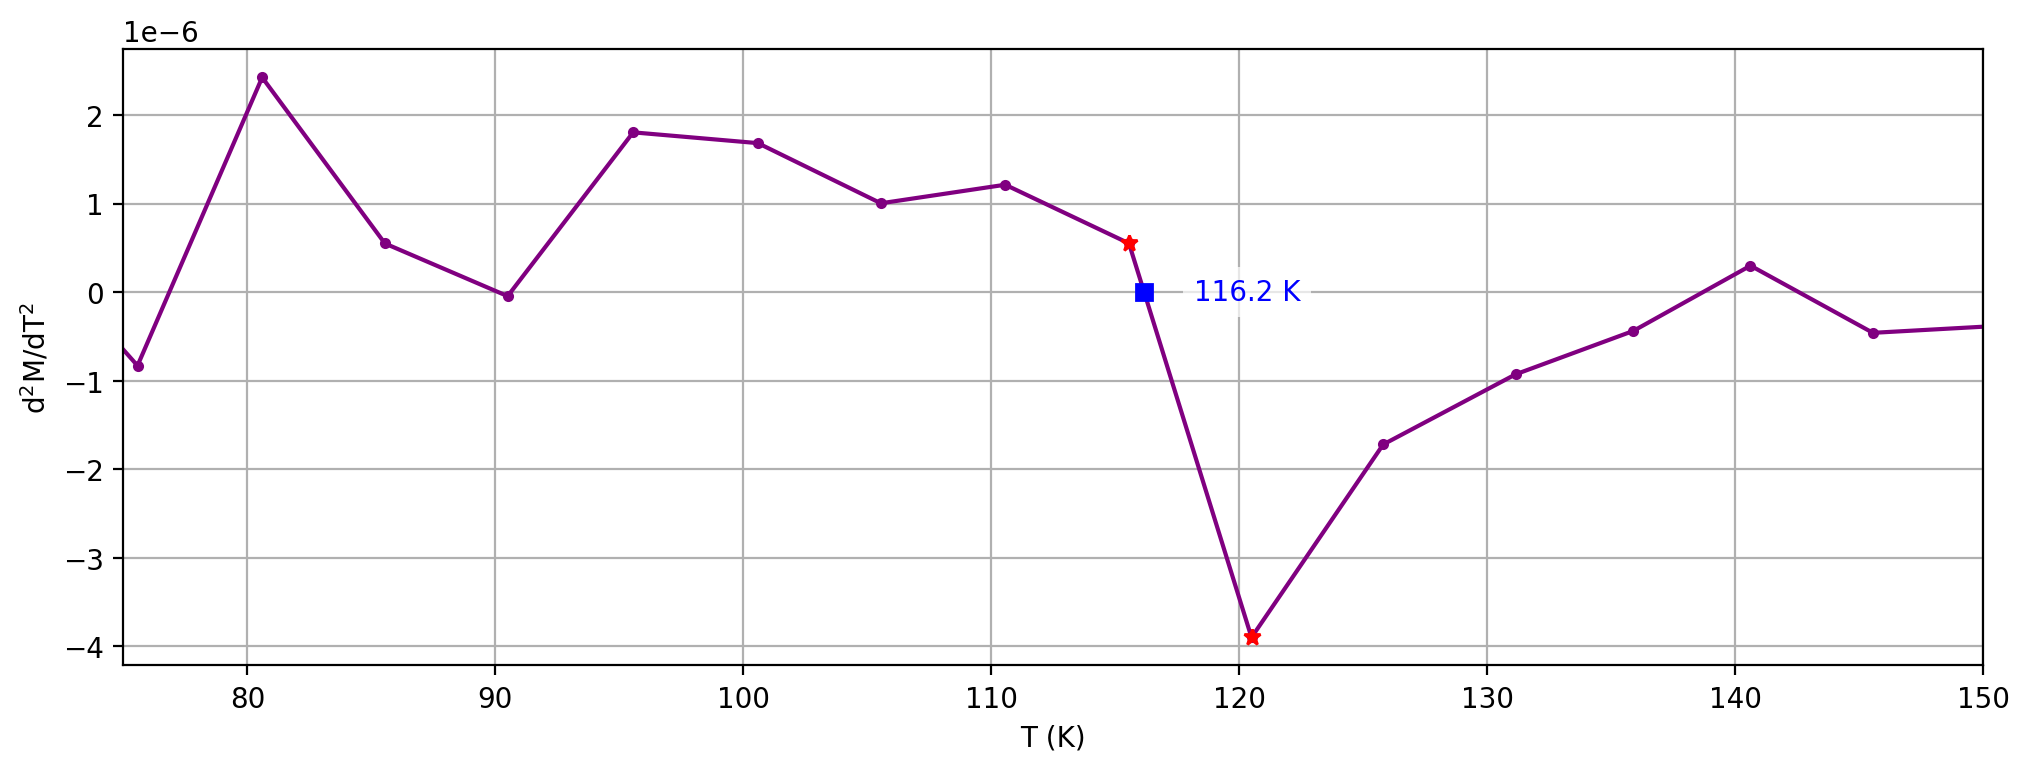


NED2-8c


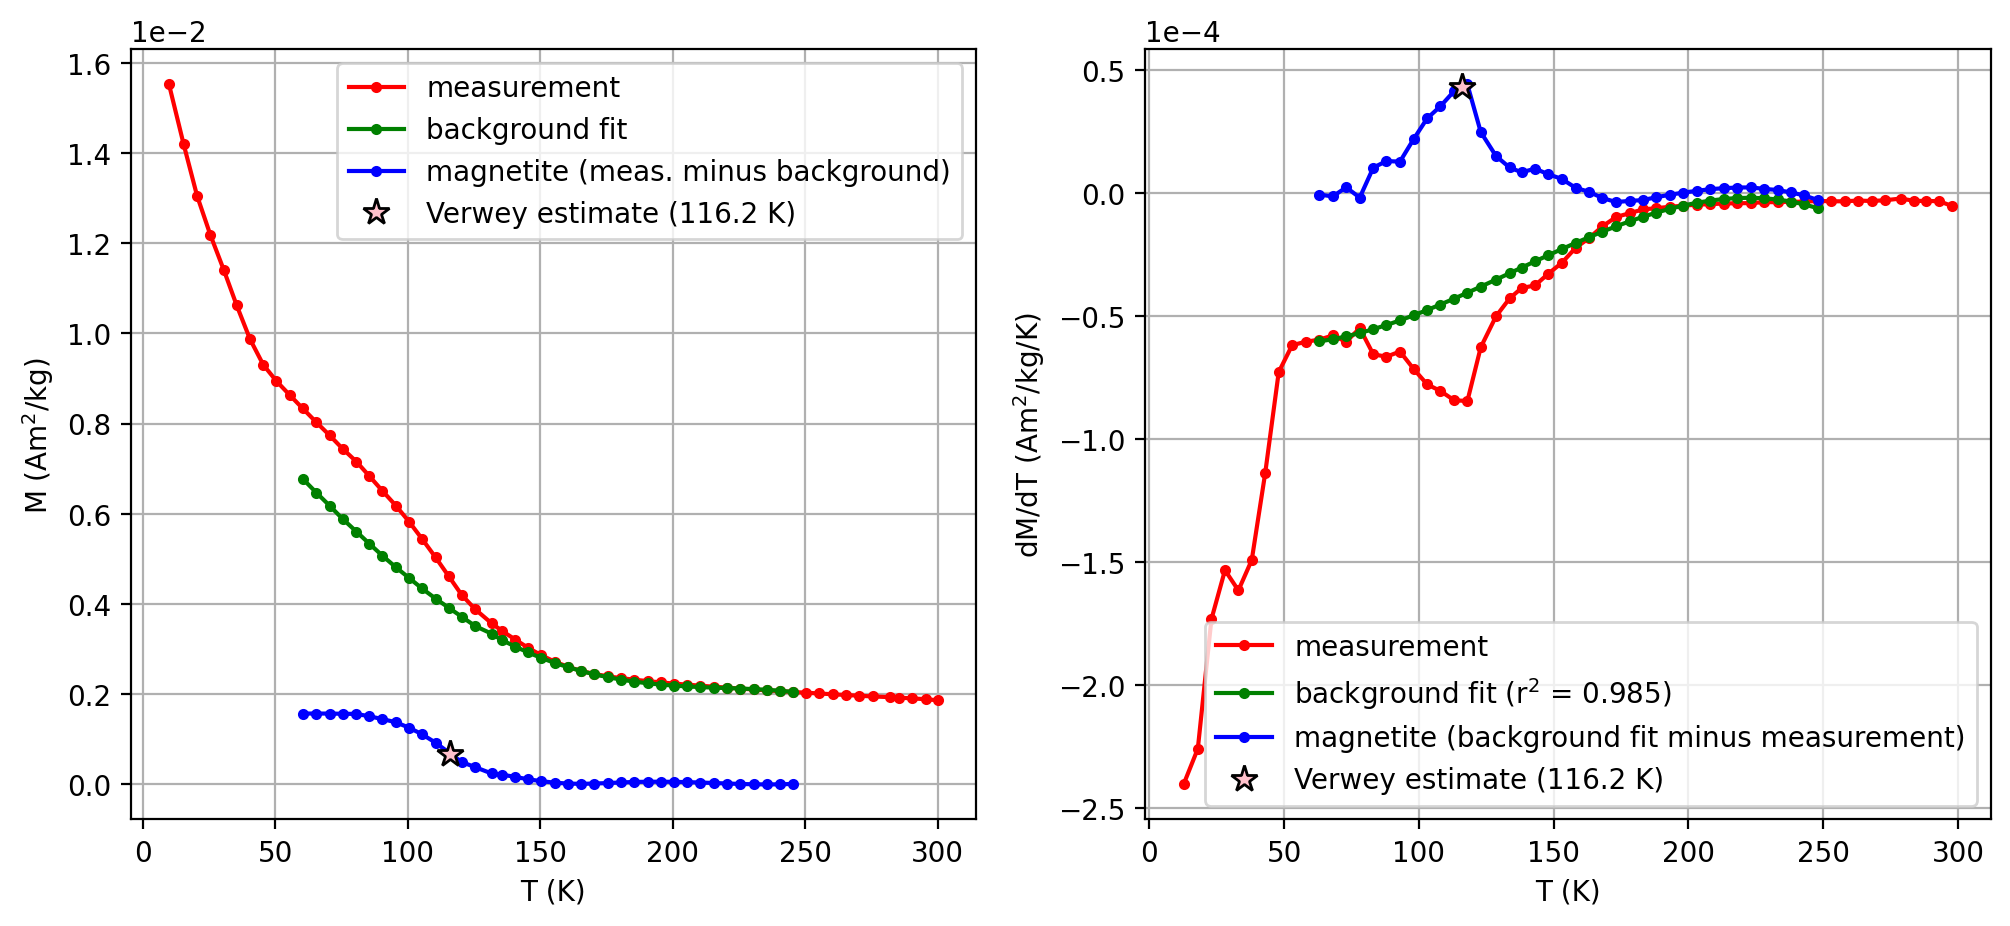

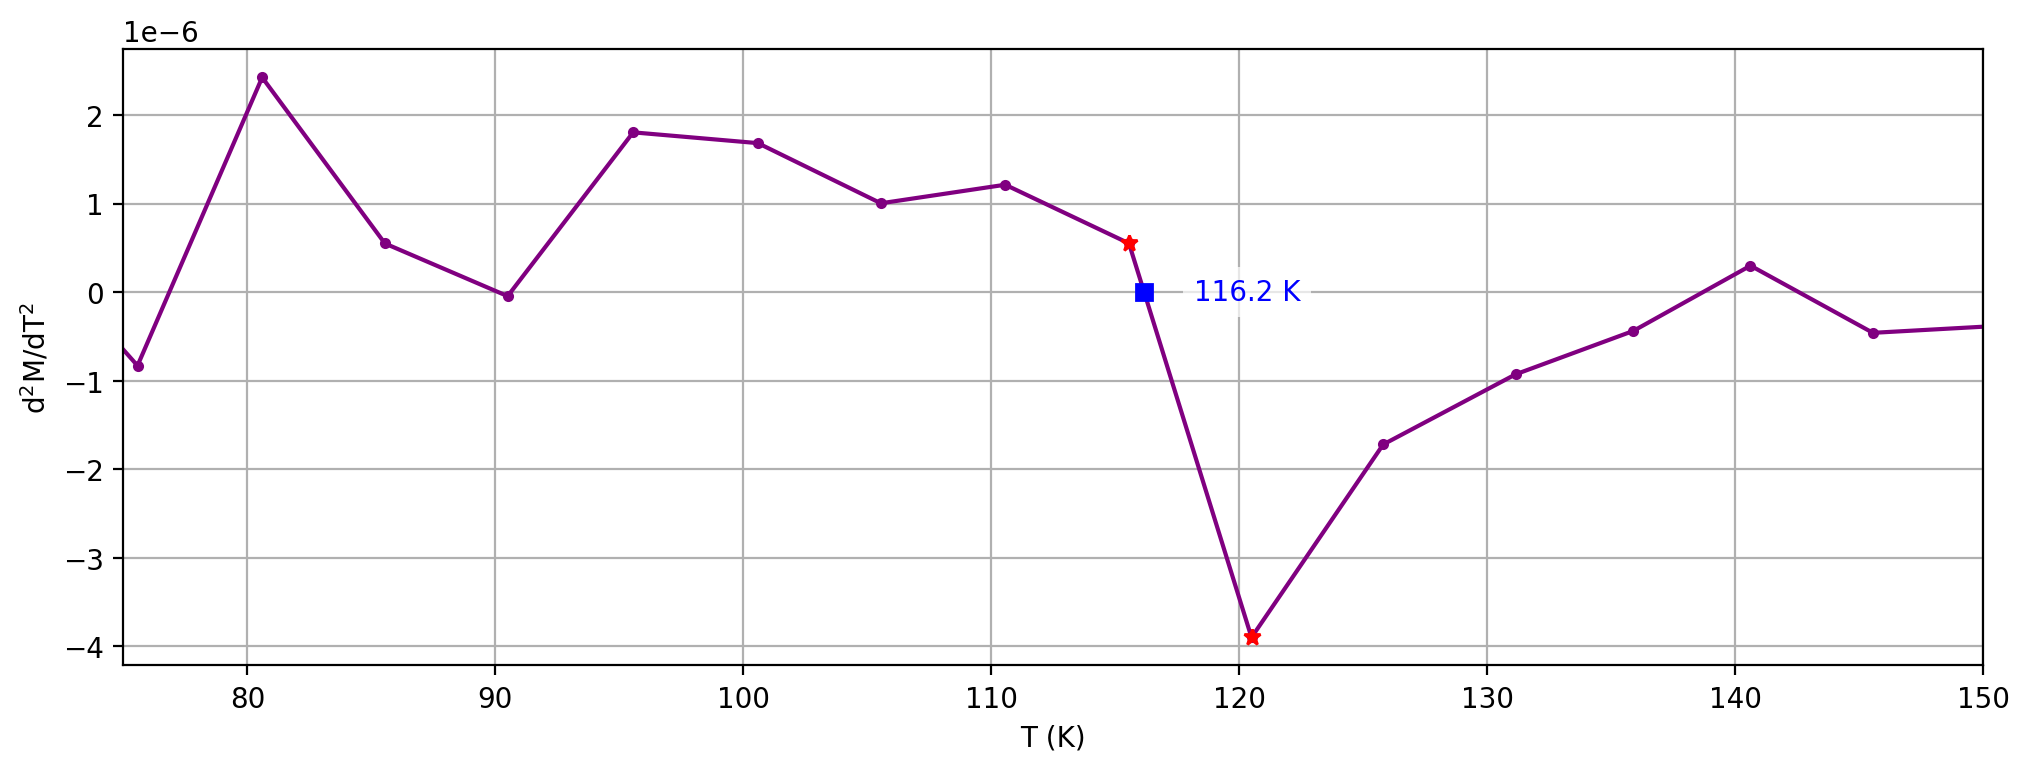

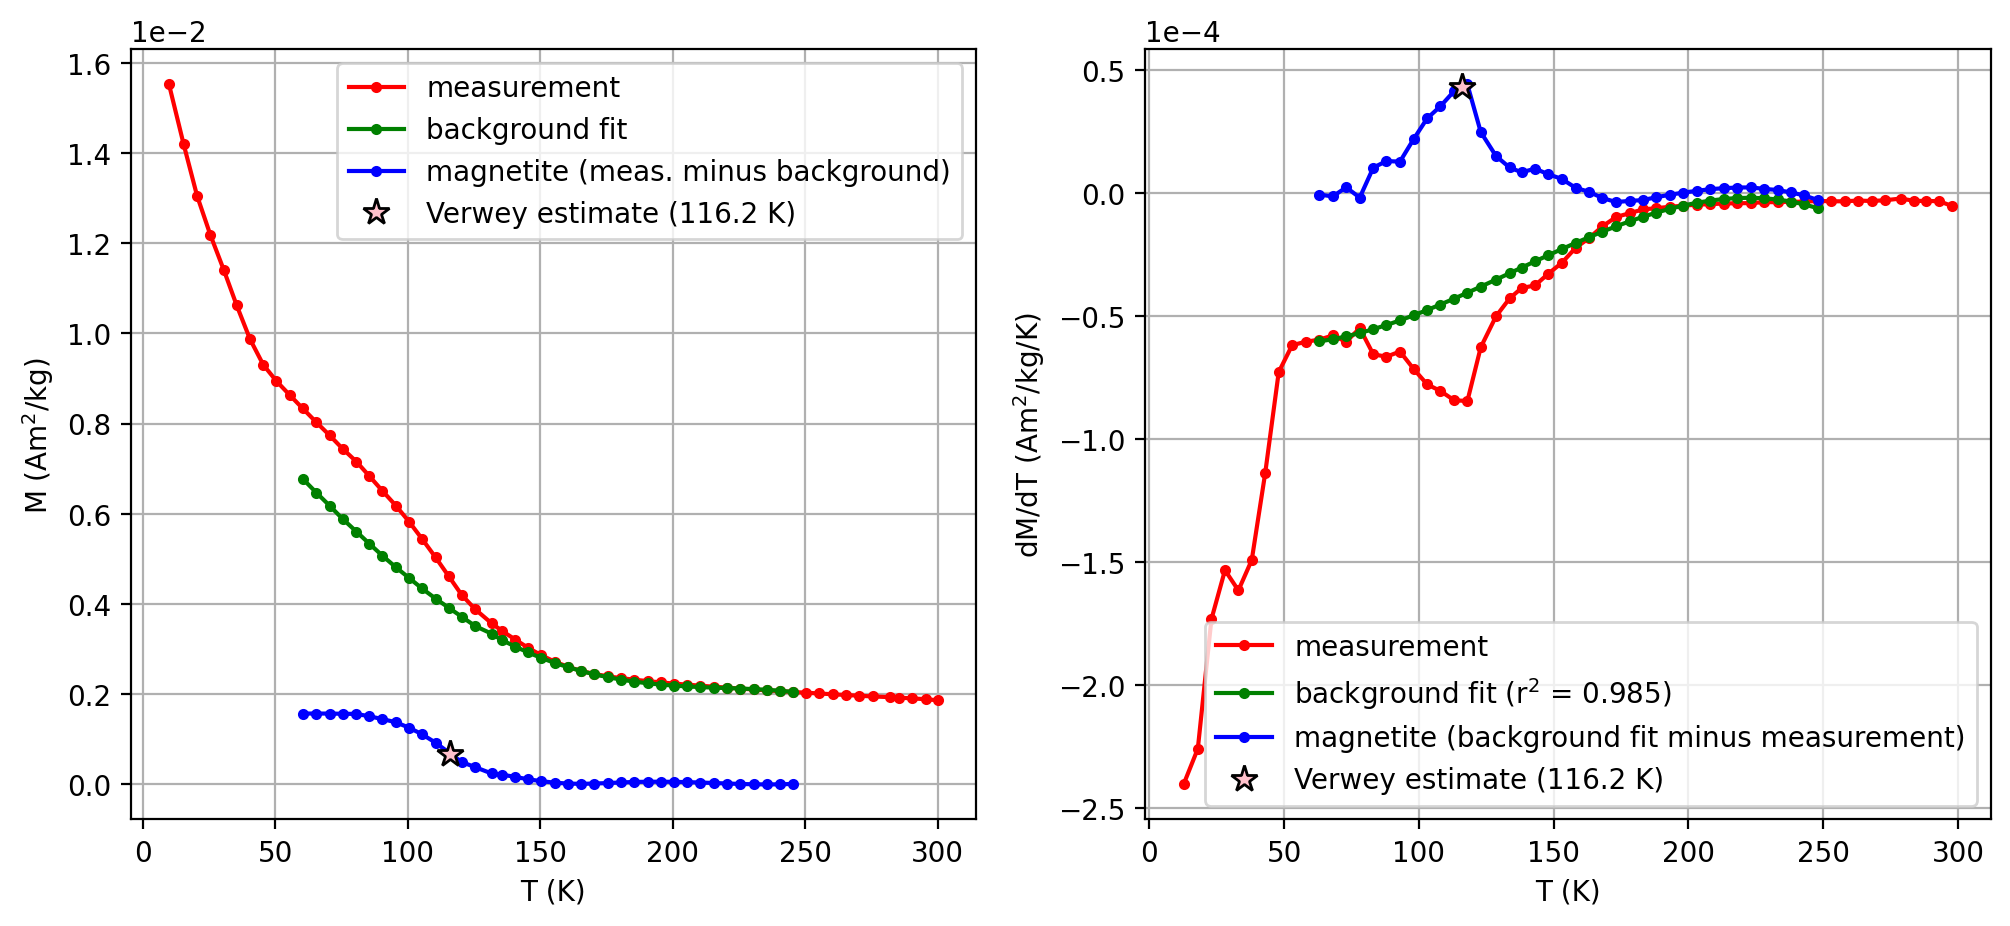

In [5]:
specimen_name = 'NED18-2c'
print(specimen_name)
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']
verwey_estimate = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min=60,
                                       t_range_background_max=250,
                                       excluded_t_min=75,
                                       excluded_t_max=150,
                                       poly_deg=3,
                                       plot_zero_crossing = True)

print('')

specimen_name = 'NED2-8c'
print(specimen_name)
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']
verwey_estimate = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min=60,
                                       t_range_background_max=250,
                                       excluded_t_min=75,
                                       excluded_t_max=150,
                                       poly_deg=3,
                                       plot_zero_crossing = True)

print('')

specimen_name = 'NED2-8c'
print(specimen_name)
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']
verwey_estimate = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min=60,
                                       t_range_background_max=250,
                                       excluded_t_min=75,
                                       excluded_t_max=150,
                                       poly_deg=3,
                                       plot_zero_crossing = True)